In [1]:
!pip install pandas
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters from GridSearch: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best CV F1 Score: 0.32597065924513013

=== Final Model Evaluation ===
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1449
           1       0.00      0.00      0.00       351

    accuracy                           0.81      1800
   macro avg       0.40      0.50      0.45      1800
weighted avg       0.65      0.81      0.72      1800

Confusion Matrix:
 [[1449    0]
 [ 351    0]]

Performance Summary:
                    Accuracy  Precision  Recall  F1-score
SVM (Best Kernel)     0.805        0.0     0.0       0.0


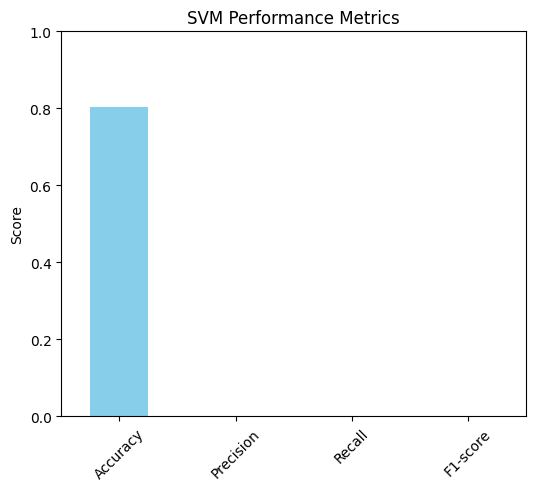

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# -------------------------------
# Load and preprocess dataset
# -------------------------------
file_path = "Employee_Performance_Retention.csv"
df = pd.read_csv(file_path)

# Drop irrelevant column
df = df.drop(columns=["Employee_ID"])

# Encode target
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])  # Yes=1, No=0

# One-hot encode categorical features
X = pd.get_dummies(df.drop("Attrition", axis=1), drop_first=True)
y = df["Attrition"]

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------------
# GridSearchCV for best hyperparams
# -------------------------------
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"],
    "kernel": ["linear", "rbf", "poly"],
    "degree": [2, 3]  # Only matters for poly kernel
}

grid = GridSearchCV(
    SVC(class_weight="balanced"),
    param_grid,
    cv=3,
    scoring="f1",
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("\nBest Parameters from GridSearch:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)

# -------------------------------
# Train final SVM with best params
# -------------------------------
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("\n=== Final Model Evaluation ===")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------------------
# Performance Summary
# -------------------------------
results = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1-score": f1
}
results_df = pd.DataFrame(results, index=["SVM (Best Kernel)"])
print("\nPerformance Summary:\n", results_df)

# -------------------------------
# Plot metrics
# -------------------------------
results_df.T.plot(kind="bar", legend=False, figsize=(6, 5), color="skyblue")
plt.title("SVM Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
